In [1]:
import numpy as np
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# put parent dir in path
sys.path.insert(0,'..')

## Get Path Info

In [3]:
# get exp num
while True:
    try:
        exp_num = int(input())
        break
    except ValueError:
        print("Must be an integer")

metrics_path = os.path.join("..", "model_metrics", "exp" + str(exp_num))

1


## Train Metrics

In [10]:
scores = np.load(os.path.join(metrics_path, "train_scores.npy"), allow_pickle=True)
auc = np.load(os.path.join(metrics_path, "train_auc_all.npy"), allow_pickle=True)
fpr = np.load(os.path.join(metrics_path, "train_fpr_all.npy"), allow_pickle=True)
tpr = np.load(os.path.join(metrics_path, "train_tpr_all.npy"), allow_pickle=True)
thresh = np.load(os.path.join(metrics_path, "train_thresholds_all.npy"), allow_pickle=True)

In [11]:
# get thresh to reindex by
thresh_lens = np.array([i.shape[0] for i in thresh])
rein_thresh = thresh[np.argmax(thresh_lens)]

# reindex all these values so we are using the same thresholds
for i in range(thresh.shape[0]):
    df = pd.DataFrame(columns=['fpr', 'tpr', 'thresh'])
    df['fpr'] = fpr[i]
    df['tpr'] = tpr[i]
    df['thresh'] = thresh[i]

    df = df.set_index('thresh').reindex(index=rein_thresh, method='nearest').reset_index()
    fpr[i] = df['fpr'][:, None]
    tpr[i] = df['tpr'][:, None]
    thresh[i] = df['thresh'][:, None]

fpr = np.hstack(fpr).T
tpr = np.hstack(tpr).T
thresh = np.hstack(thresh).T

In [12]:
# get theta*
best_thresh_inds = np.argmax(np.square(tpr) + np.square(1 - fpr), axis=1)
best_threshs = thresh[np.arange(10), best_thresh_inds]
print(best_threshs)

# get sens/spec
sens = 1 - fpr[np.arange(10), best_thresh_inds]
spec = tpr[np.arange(10), best_thresh_inds]

[0.26078239 0.3829459  0.5161701  0.27780322 0.35425021 0.3829459
 0.29490425 0.27780322 0.27780322 0.25288872]


<Figure size 432x288 with 0 Axes>

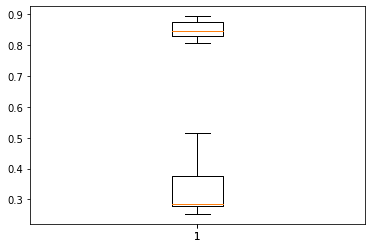

<Figure size 432x288 with 0 Axes>

In [7]:
# generate plots
plt.boxplot(best_threshs)
plt.boxplot(sens)
#plt.boxplot(spec)
#plt.boxplot(scores)
plt.figure()

In [187]:
pd.read_csv("../data/loaded/processed/medication_processed.csv")

,patientunitstayid,0,2,5,14,19,36,38,41,44,56,59,65,71,80,83,92,95,99
0,172448,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,242714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,243176,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,245210,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,247522,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,3348450,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
775,3350651,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
776,3350835,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
777,3351268,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
